# C14-hepatocyte analysis

In [2]:
import datetime
from IPython.display import display
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline

mem = joblib.Memory(location='~/tmp/hepato/', verbose=0)

import logging

%load_ext rpy2.ipython

# logging.basicConfig(filename='c14.log',
#                              filemode='a',
#                              format='%(asctime)s,%(msecs)d %(name)s %(levelname)s %(message)s',
#                             datefmt='%H:%M:%S',
#                              level=logging.DEBUG)
logging.basicConfig(level=logging.WARNING)

In [3]:
%%R
library(ggplot2)

In [4]:
logger = logging.getLogger()
logger.setLevel(logging.WARNING)

In [5]:
# %load_ext autoreload
# %autoreload 2
import c14
import c14.models.liver
import c14.models.minimal

In [27]:
R = c14.models.liver.R()

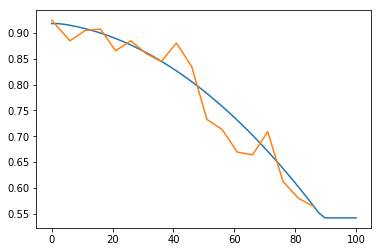

In [33]:
t = np.linspace(0, 100)
ploidy_data = pd.read_excel(c14.models.liver.default_path)
plt.plot(t, R.ploidy(t))
plt.plot(ploidy_data['age_min'], ploidy_data['2C_mean']/100)

In [40]:
parameters = pd.read_hdf('../../../data/julian_fits_200124/richtig_R_kappa_wo_limit.pandas').reset_index()

In [41]:
parameters.head()

,time,para,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
0,0,delta2,1.206706,1.733297,0.133503,4.832837,0.036390,0.025735,2268.682207,2268.682207,2004.865588,5507.946088,1.071037
1,0,delta4,0.068528,0.046329,0.000025,0.124742,0.001453,0.001028,1016.568653,1016.568653,817.476957,839.351367,1.167258
2,0,kappa24,0.000396,0.000945,0.000001,0.002010,0.000016,0.000011,3589.079727,3589.079727,1686.226563,6658.776874,1.079769
3,0,kappa42,0.025199,0.037624,0.000001,0.096131,0.001414,0.001000,708.067068,708.067068,828.515442,2569.747790,1.169509
4,0,r2,1.204860,1.733417,0.138519,4.833062,0.036401,0.025743,2267.639962,2267.639962,2016.309341,5480.473114,1.070771


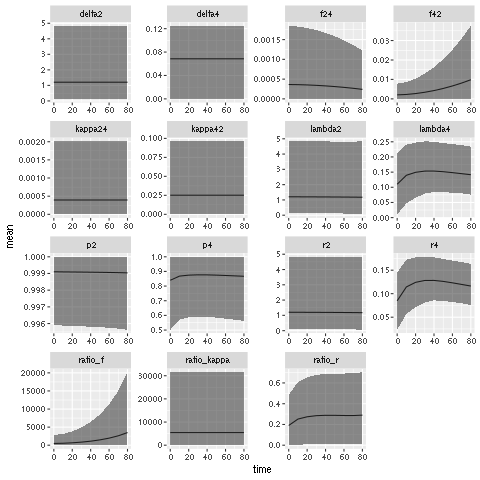

In [42]:
%%R -i parameters
ggplot(parameters, aes(x=time, y=mean, ymin=hpd_3., ymax=hpd_97.)) + 
    facet_wrap(~para, scale='free') +
    geom_line() +
    geom_ribbon(aes(alpha = 0.1), show.legend=F)

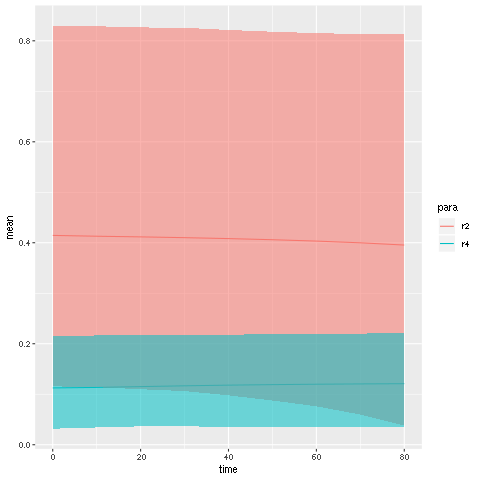

In [37]:
%%R -i parameters
ggplot(parameters[parameters$para %in% c('r2', "r4"),],
       aes(x=time, y=mean, ymin=hpd_3., ymax=hpd_97., fill=para)) + 
    geom_line(aes(color=para)) +
    geom_ribbon(aes(alpha = 0.0001), show.legend=F)

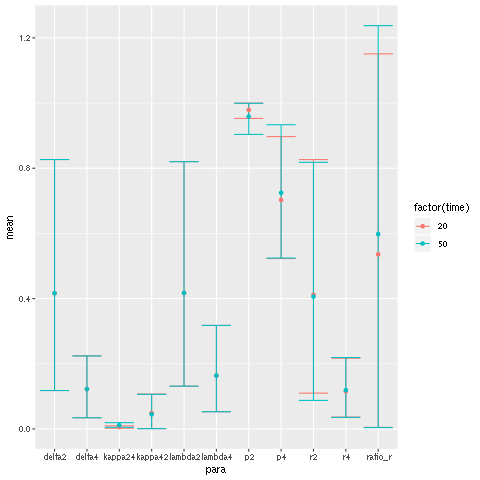

In [38]:
%%R -i parameters
ggplot(parameters[(parameters$time %in% c(20, 50)) & !(parameters$para %in% c('ratio_kappa', 'ratio_f')), ], aes(x=para, y=mean, ymin=hpd_3., ymax=hpd_97., color=factor(time))) + 
    geom_errorbar() + 
    geom_point()

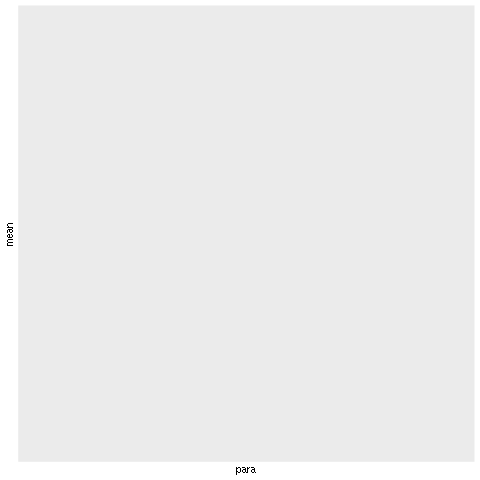

In [39]:
%%R -i parameters
ggplot(parameters[(parameters$time %in% c(0)) & (parameters$para %in% c('ratio_f')), ], aes(x=para, y=mean, ymin=hpd_3., ymax=hpd_97., color=factor(time))) + 
    geom_errorbar() + 
    geom_point()